# Tiny Countries

### Import Packages and Data

In [2]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# suppressing warnings can help keep notebook looking clean
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# import data from geojson.xyz
df_in = gpd.read_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_tiny_countries.geojson')

In [4]:
df = df_in.copy()

In [5]:
# write a copy of the data to file
df.to_file("./data/tiny-countries.json", driver='GeoJSON')

### Examine and Process Data

In [6]:
# quick sample of the data
# right off the bat, we can see a couple ways to categorize the data further:
# by type or by region/subregion
df.sample(10)

,scalerank,sr_label_i,sr_label_o,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
37,2,2,6,United States of America,US1,1,2,Dependency,Guam,GUM,...,Oceania,Micronesia,East Asia & Pacific,4,4,4,2,-99,Admin-0 Tiny Countries Pacific,POINT (144.77004 13.45968)
50,2,3,6,Denmark,DN1,1,2,Dependency,Faroe Islands,FRO,...,Europe,Northern Europe,Europe & Central Asia,10,14,10,3,-99,Admin-0 Tiny Countries,POINT (-6.94257 62.19162)
72,2,3,6,United Kingdom,GB1,1,2,Dependency,South Georgia and South Sandwich Islands,SGS,...,Seven seas (open ocean),Seven seas (open ocean),Antarctica,25,40,13,3,-99,Admin-0 Tiny Countries,POINT (-36.79214 -54.27448)
29,2,3,5,Malta,MLT,0,2,Sovereign country,Malta,MLT,...,Europe,Southern Europe,Middle East & North Africa,5,5,5,3,1,Admin-0 Tiny Countries,POINT (14.43818 35.88208)
38,2,3,6,Federated States of Micronesia,FSM,0,2,Sovereign country,Federated States of Micronesia,FSM,...,Oceania,Micronesia,East Asia & Pacific,10,30,6,-99,1,Admin-0 Tiny Countries Pacific,POINT (158.24202 6.88594)
64,5,5,5,San Marino,SMR,0,2,Sovereign country,San Marino,SMR,...,Europe,Southern Europe,Europe & Central Asia,10,10,4,5,1,Admin-0 Tiny Countries,POINT (12.45879 43.94094)
13,2,3,6,United Kingdom,GB1,1,2,Dependency,Pitcairn Islands,PCN,...,Oceania,Polynesia,East Asia & Pacific,12,16,8,-99,-99,Admin-0 Tiny Countries Pacific,POINT (-128.31780 -24.36414)
15,4,4,4,Saint Kitts and Nevis,KNA,0,2,Sovereign country,Saint Kitts and Nevis,KNA,...,Americas,Caribbean,Latin America & Caribbean,19,21,7,4,1,Admin-0 Tiny Countries,POINT (-62.57807 17.14717)
67,4,5,6,Andorra,AND,0,2,Sovereign country,Andorra,AND,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,5,1,Admin-0 Tiny Countries,POINT (1.54770 42.53681)
33,2,3,3,Singapore,SGP,0,2,Sovereign country,Singapore,SGP,...,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,3,1,Admin-0 Tiny Countries,POINT (103.81482 1.35936)


In [7]:
# the data is seemingly grouped into 5 different types
# it is unclear the meaning behind "geo unit" and "geo subunit", although Palestine is categorized as such
# it also appears from certain samples that "country" most likely refers to constituent countries,
# as both Curacao and Aland are labeled this way
# thus, we have to ask the question: in our map of tiny countries, are we including dependencies/constituents?
print(df['type'].unique())
print(df['type'].value_counts())

['Dependency' 'Country' 'Sovereign country' 'Geo unit' 'Geo subunit']
Sovereign country    33
Dependency           23
Country               9
Geo unit              9
Geo subunit           2
Name: type, dtype: int64


In [8]:
# "region_un" looks promising, essentially sorting into continents
# "subregion" does not appear to be a viable choice, too many categories with too little entries each
# "region_wb" seems to be some sort of combination of both
print(df['region_un'].unique())
print(df['region_un'].value_counts())
print(df['subregion'].unique())
print(df['subregion'].value_counts())
print(df['region_wb'].unique())
print(df['region_wb'].value_counts())

['Americas' 'Oceania' 'Africa' 'Seven seas (open ocean)' 'Europe' 'Asia']
Americas                   23
Oceania                    18
Europe                     17
Asia                        9
Africa                      5
Seven seas (open ocean)     4
Name: region_un, dtype: int64
['Caribbean' 'Polynesia' 'Middle Africa' 'Seven seas (open ocean)'
 'Western Africa' 'Southern Europe' 'Western Asia' 'Southern Asia'
 'South-Eastern Asia' 'Micronesia' 'Melanesia' 'Eastern Africa'
 'Northern Europe' 'Northern America' 'Western Europe' 'Eastern Asia']
Caribbean                  21
Polynesia                  10
Southern Europe             8
Micronesia                  7
Northern Europe             6
Seven seas (open ocean)     4
Western Asia                4
Eastern Africa              3
Western Europe              3
Eastern Asia                2
South-Eastern Asia          2
Northern America            2
Melanesia                   1
Southern Asia               1
Western Africa             

In [9]:
# for the purposes of this project we will proceed using "type"
# there are many possibilities with "region_un", but its data will be redundant,
# as we are mapping it onto a world map with continents already labeled
# let us focus on solely the tiny countries that are also sovereign
df_sovereign = df[df['type'] == 'Sovereign country']

In [10]:
# we will be mapping out these 33 sovereign tiny countries
# but it'd be a boring map with just 33 points...
# browsing through the info, there are possible ways to further categorize/explore!
# notably "pop_est"
df_sovereign.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 33 entries, 6 to 67
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   scalerank     33 non-null     int64   
 1   sr_label_i    33 non-null     int64   
 2   sr_label_o    33 non-null     int64   
 3   sovereignt    33 non-null     object  
 4   sov_a3        33 non-null     object  
 5   adm0_dif      33 non-null     int64   
 6   level         33 non-null     int64   
 7   type          33 non-null     object  
 8   admin         33 non-null     object  
 9   adm0_a3       33 non-null     object  
 10  geou_dif      33 non-null     int64   
 11  geounit       33 non-null     object  
 12  gu_a3         33 non-null     object  
 13  su_dif        33 non-null     int64   
 14  subunit       33 non-null     object  
 15  su_a3         33 non-null     object  
 16  brk_diff      33 non-null     int64   
 17  name          33 non-null     object  
 18  name

In [11]:
# perfect!
# with this info, we can not only map out the the tiny sovereign countries
# but also color code them by population!
# it'd be interesting to see up to how many people can live in these tiny areas
df_sovereign['pop_est']

6      219998
11     120898
14      85632
15      40131
19      72660
21     160267
22     104574
23      90739
24     284589
25    1310000
26     212679
29     405165
30     727785
31     396334
33    4657542
34     388190
35      20796
38     107434
39      64522
40     112850
41      14019
42      12373
43     218519
44    4017095
46    1284264
48     752438
49      87476
58     491775
63      34761
64      30324
65        832
66      32965
67      83888
Name: pop_est, dtype: int64

In [22]:
# in the example, the drop method is used to filter out the columns we need
# in this case, 65 columns will be too many to drop one by one
# instead, we'll create a new variable "df_filtered" to hold the 3 columns we need
df_filtered = df_sovereign[['admin', 'pop_est', 'geometry']]
df_filtered

,admin,pop_est,geometry
6,Samoa,219998,POINT (-172.41373 -13.63737)
11,Tonga,120898,POINT (-175.23533 -21.15819)
14,Antigua and Barbuda,85632,POINT (-61.78580 17.07294)
15,Saint Kitts and Nevis,40131,POINT (-62.57807 17.14717)
19,Dominica,72660,POINT (-61.35368 15.43158)
21,Saint Lucia,160267,POINT (-60.97796 13.87810)
22,Saint Vincent and the Grenadines,104574,POINT (-61.20171 13.23185)
23,Grenada,90739,POINT (-61.67686 12.10837)
24,Barbados,284589,POINT (-59.55431 13.17467)
25,Trinidad and Tobago,1310000,POINT (-61.25519 10.43680)


In [21]:
# let us sort the data by "pop_est" since that will be the focus
df_sorted = df_filtered.sort_values(by=['pop_est'])
df_sorted

,admin,pop_est,geometry
65,Vatican,832,POINT (12.45045 41.90070)
42,Tuvalu,12373,POINT (179.20397 -8.49972)
41,Nauru,14019,POINT (166.93748 -0.52307)
35,Palau,20796,POINT (134.57924 7.50749)
64,San Marino,30324,POINT (12.45879 43.94094)
66,Monaco,32965,POINT (7.39713 43.75027)
63,Liechtenstein,34761,POINT (9.53914 47.12678)
15,Saint Kitts and Nevis,40131,POINT (-62.57807 17.14717)
39,Marshall Islands,64522,POINT (168.72897 7.31346)
19,Dominica,72660,POINT (-61.35368 15.43158)


In [23]:
# to make things easier to color code, we will add a color column here
# in the past we have done this via JavaScript, but I thought I'd change it up
color = ['#fef001', '#fef001', '#fef001', '#fef001', '#fef001', '#fef001', '#fef001', '#fef001',
         "#fd9a01", "#fd9a01", "#fd9a01", "#fd9a01", "#fd9a01", "#fd9a01",
        "#fd6104", "#fd6104", "#fd6104", "#fd6104", "#fd6104", "#fd6104", "#fd6104", "#fd6104", "#fd6104", "#fd6104", "#fd6104", "#fd6104", "#fd6104",
        "#f00505", "#f00505", "#f00505", "#f00505", "#f00505", "#f00505"]

df_sorted['color'] = color

In [25]:
# double check to see if the color codes are in
df_sorted

,admin,pop_est,geometry,color
65,Vatican,832,POINT (12.45045 41.90070),#fef001
42,Tuvalu,12373,POINT (179.20397 -8.49972),#fef001
41,Nauru,14019,POINT (166.93748 -0.52307),#fef001
35,Palau,20796,POINT (134.57924 7.50749),#fef001
64,San Marino,30324,POINT (12.45879 43.94094),#fef001
66,Monaco,32965,POINT (7.39713 43.75027),#fef001
63,Liechtenstein,34761,POINT (9.53914 47.12678),#fef001
15,Saint Kitts and Nevis,40131,POINT (-62.57807 17.14717),#fef001
39,Marshall Islands,64522,POINT (168.72897 7.31346),#fd9a01
19,Dominica,72660,POINT (-61.35368 15.43158),#fd9a01


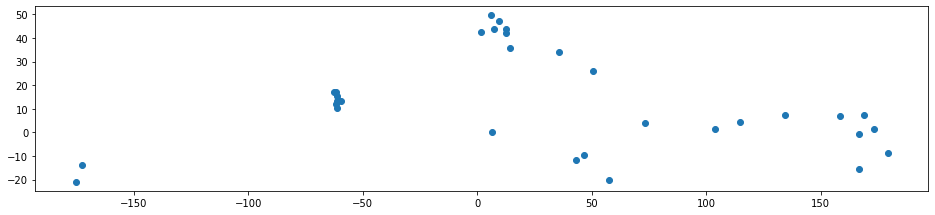

In [31]:
# the visual
df_sorted.plot(figsize=(16,12));

### Export Data

In [32]:
# finally, export the file to be used in the map
df_sorted.to_file("../map/data/tiny_countries_final.json", driver='GeoJSON')